# Figure 5

In [24]:
## Basics
import numpy as np
import pandas as pd
import re
import random
from scipy import stats

## Bio functions
from Bio import AlignIO
from Bio import SeqIO

## Local functions
import sys
sys.path.append("../code/scripts")
import composition as comp

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Arial"

## Colors
cscheme = {'pos':'#0177BB', 'neg':'#CB3627', 'dis':'#828282', 'helix':'#009988', 'sheet':'#EE7733', 'cr':'#AA4499',
          'null':"black"}

## Set seed for consistency
### In the future when writing code with random remember to use new methods which explicitly create generators
seed = 212121

In [3]:
all_cr_data = pd.read_csv("../data/charged_regions/cr_raw.csv", comment = "#")
FUN12s = all_cr_data[all_cr_data['gene']=="FUN12"]
FUN12s

,orf,gene,seq.len,left.bound,right.bound,region.seq,region.len,charge.asymmetry,frac.charge,kappa1,kappa2,uni_id,orf_label
11,YAL035W,FUN12,1003,62,132,MSTLKQSKKKQEKKVIEEKKDGKPILKSKKEKEKEKKEKEKQKKKE...,71,0.077293,0.577465,0.046267,0.097054,P39730,verified
12,YAL035W,FUN12,1003,169,257,LAALRRQLELKKQLEEQEKLEREEEERLEKEEEERLANEEKMKEEA...,89,0.005107,0.617978,0.053774,0.088932,P39730,verified
13,YAL035W,FUN12,1003,261,328,KVAGLAKKDGEENKPKKVVYSKKKKRTTQENASEAIKSDSKKDSEV...,68,0.001838,0.470588,0.136581,0.312018,P39730,verified


## Alphafold

In [61]:
FUN12_af = AlignIO.read('../data/eIF5B/af_eIF5B_aligned.fa', format='fasta')
FUN12_af_mat = np.asarray(FUN12_af)

# Helix-containing region position
start = 624
end = 715

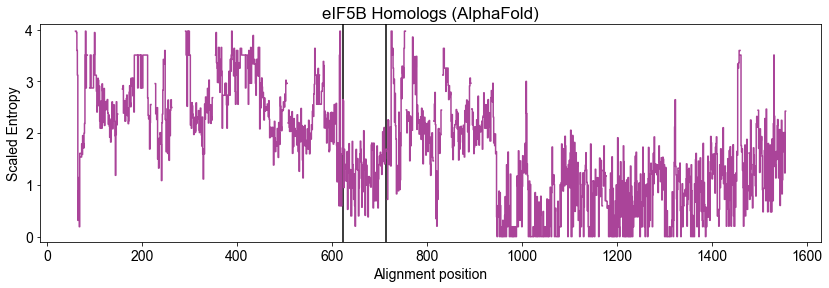

In [90]:
FUN12_af_seq_ents = []
coverage_cutoff = 0.1

for p, pos in enumerate(FUN12_af_mat.T):
    FUN12_af_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

coverage_weights = []
    
for p, pos in enumerate(FUN12_af_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff:
        coverage_weights.append(np.nan)
    else:
        coverage_weights.append(coverage)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(0, len(FUN12_af_seq_ents)),
         np.array(FUN12_af_seq_ents)*np.array(coverage_weights), color = cscheme['cr'])
plt.vlines(x = start, ymin=-5, ymax=100, color="black")
plt.vlines(x = end, ymin=-5, ymax=100, color="black")
plt.xlabel('Alignment position')
plt.ylabel('Scaled Entropy')
plt.title("eIF5B Homologs (AlphaFold)")
plt.ylim(-0.1, 4.1)
plt.show()

## AYbRAH

In [34]:
FUN12_aybrah = AlignIO.read('../data/eIF5B/aybrah_eIF5B_aligned.fa', format='fasta')
for record in FUN12_aybrah:
    outs = re.search("\s[a-z]{3}\s", record.description)
    record.id = outs.group(0).strip()

aybrah_start = 309
aybrah_end = 397

print(FUN12_aybrah[:, start:end])

FUN12_aybrah_mat = np.asarray(FUN12_aybrah)

Alignment with 32 rows and 505 columns
--------------------------------------------...AQA rgm
TEISDDEYFAPKKGKKAKKGG------KPATPAAEEEEE-----...KSA sai
TELDDDEFDYKPKKGKKGKKS------K-KVEEDDEPQEIESPQ...APA spo
ANL-DDEFALPEKKGKGGKGKQQQQQQK-AAPAAAAKKD-----...QAA ncr
ASLDDDEFALPQKKGKGGKG-------K-PAPAAAATKE-----...QAA tre
GTFDEDDVFA--GKAKPKKA-------A-AAPEPKPAE------...EEA ang
EED-ADETKDATPASKNNGAD------K-AEVGDDDD-------...RAA lst
DEFEGGGLMGALRKSKKKKDA------R-DAKDAKA--------...SRA yli
PEE-PSGLMSALRKSKKKKDD------K-EAEAKAEA-------...NNA arx
DEF-PDDFMSALKRRKNKKGA------E-PTPAPAPGP------...TKA nfu
--------MDALKQSKAKQED------K----------------...SST aru
DSL-AGDFMATLKKSKNKKQQ------K-DEKEKEEKA------...LPS pta
EAE-EADFLSALKASKDKLEK------K-AEDEA----------...KAA ppa
DDL-SGDFMSMLRKTKNKKQQ------K-EEEVAKPT-------...SPA kcp
DEF-ADDFLSNLKRAKGKKAQ------K-VKQEEDERAAAQAA-...KSN car
EDF-ADDFLSNLKRAKNKKQA------K-AKQEEEEKA------...EKN opm
EAP-ANDFMANLKKAKNKQDE------K-KKKEEEEKKK-----...PEP dbx
DESSGVDFLSNLKKAKTKKDK-----

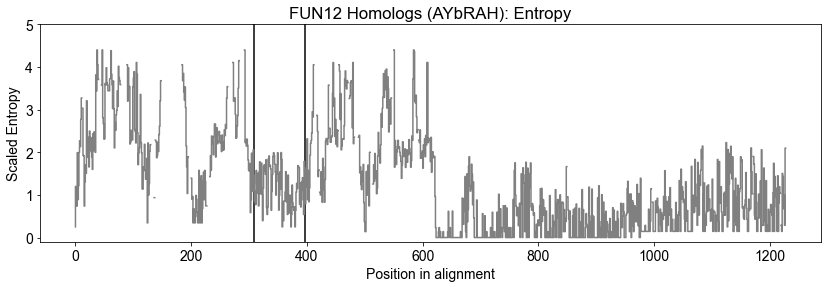

In [35]:
FUN12_aybrah_seq_ents = []
coverage_cutoff = 0.1

for p, pos in enumerate(FUN12_aybrah_mat.T):
    FUN12_aybrah_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

coverage_weights = []
    
for p, pos in enumerate(FUN12_aybrah_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff:
        coverage_weights.append(np.nan)
    else:
        coverage_weights.append(coverage)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(0, len(FUN12_aybrah_seq_ents)),
         np.array(FUN12_aybrah_seq_ents)*np.array(coverage_weights), color = 'grey')
plt.vlines(x = aybrah_start, ymin=-5, ymax=100, color="black")
plt.vlines(x = aybrah_end, ymin=-5, ymax=100, color="black")
plt.xlabel('Position in alignment')
plt.ylabel('Scaled Entropy')
plt.title("FUN12 Homologs (AYbRAH): Entropy")
plt.ylim(-0.1, 5)
plt.show()

## OrthoDB

(This likely includes mt versions of the proteins)

In [41]:
more_FUN12s = AlignIO.read('../data/eIF5B/OrthoDB_eIF5B_atfungi_aligned_refined2.fa', format='fasta')

# Notes for finding organisms
# S. cer is 1294385_1
# The OrthoDB is H833_YJM1573A00027 (YJM1573), 

odb_start = 803
odb_end = 908

In [38]:
start2 = 0
end2 = 1325
endd = 2123

more_FUN12s_all_mat = np.asarray(more_FUN12s)[:,start2:endd]
more_FUN12_all = []

for record in more_FUN12s:
    more_FUN12_all.append(record.seq[start2:endd])

more_FUN12_all_seqs_gapped = [str(s) for s in more_FUN12_all]
more_FUN12_all_seqs = [str(s).replace('-', "") for s in more_FUN12_all]

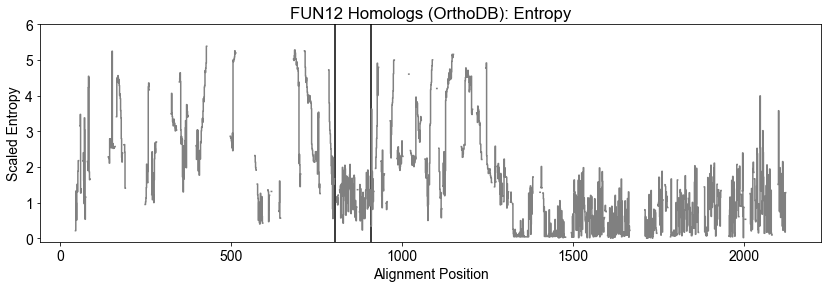

In [42]:
FUN12_all_seq_ents = []
coverage_cutoff = 0.1

for p, pos in enumerate(more_FUN12s_all_mat.T):
    FUN12_all_seq_ents.append(stats.entropy(comp.get_character_freqs(pos, gaps=True)[0]))

all_coverage_weights = []
    
for p, pos in enumerate(more_FUN12s_all_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff:
        all_coverage_weights.append(np.nan)
    else:
        all_coverage_weights.append(coverage)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(start2, start2+len(FUN12_all_seq_ents)),
         np.array(FUN12_all_seq_ents)*np.array(all_coverage_weights), color = 'grey')
plt.xlabel('Alignment Position')
plt.ylabel('Scaled Entropy')
plt.title("FUN12 Homologs (OrthoDB): Entropy")
plt.vlines(x = odb_start, ymin=-5, ymax=100, color="black")
plt.vlines(x = odb_end, ymin=-5, ymax=100, color="black")
plt.ylim((-0.1,6))
plt.show()

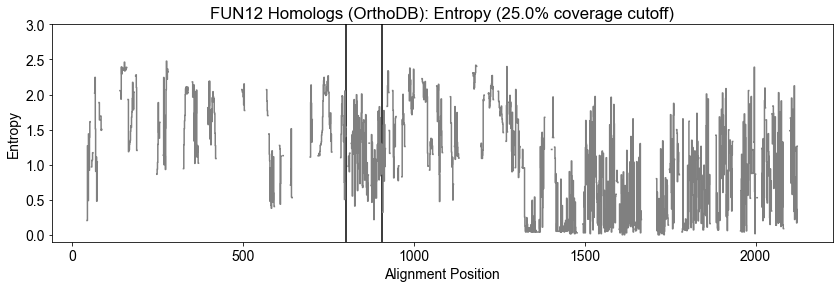

In [44]:
coverage_cutoff2 = 0.25
all_coverage_cutoffs = []
    
for p, pos in enumerate(more_FUN12s_all_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff2:
        all_coverage_cutoffs.append(np.nan)
    else:
        all_coverage_cutoffs.append(1)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(start2, start2+len(FUN12_all_seq_ents)),
         np.array(FUN12_all_seq_ents)*np.array(all_coverage_cutoffs), color = 'grey')
plt.xlabel('Alignment Position')
plt.ylabel('Entropy')
plt.title("FUN12 Homologs (OrthoDB): Entropy ({}% coverage cutoff)".format(coverage_cutoff2*100))
plt.vlines(x = odb_start, ymin=-5, ymax=100, color="black")
plt.vlines(x = odb_end, ymin=-5, ymax=100, color="black")
plt.ylim((-0.1,3))
plt.show()

## Length variation

In [56]:
str(more_FUN12s[0].seq[50:300]).replace("-", "")

'GKNVLED'

In [57]:
# for each alignment dataset
# identify region
# iterate through rows, remove gaps, and return length

def get_region_lengths(msa, start, end):
    """
    Given an AlignIO object (msa), return a vector of the lengths of all the regions in a range from start to end 
    (inclusive) without gaps
    """
    lengths = []
    for spec in msa:
        region_seq = str(spec.seq[start:end+1]).replace("-", "")
        lengths.append(len(region_seq))
    return(lengths)

In [63]:
af_helix_lengths = get_region_lengths(FUN12_af, start, end)
aybrah_helix_lengths = get_region_lengths(FUN12_aybrah, aybrah_start, aybrah_end)
odb_helix_lengths = get_region_lengths(more_FUN12s, odb_start, odb_end)

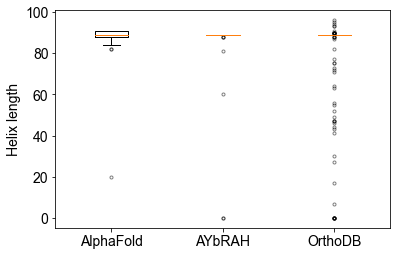

In [77]:
fig, ax = plt.subplots(figsize = (6,4))
bp = ax.boxplot([af_helix_lengths, aybrah_helix_lengths, odb_helix_lengths])
for flier in bp['fliers']:
    flier.set(marker ='.',
              color ='#e7298a',
              alpha = 0.5)
ax.set_xticklabels(['AlphaFold', 'AYbRAH', "OrthoDB"])
ax.set_ylabel("Helix length")
plt.show()

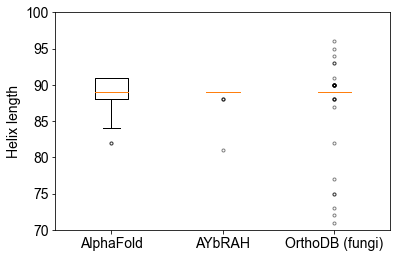

In [88]:
fig, ax = plt.subplots(figsize = (6,4))
bp = ax.boxplot([af_helix_lengths, aybrah_helix_lengths, odb_helix_lengths])
for flier in bp['fliers']:
    flier.set(marker ='.',
              color ='#e7298a',
              alpha = 0.5)
ax.set_xticklabels(['AlphaFold', 'AYbRAH', "OrthoDB (fungi)"])
ax.set_ylabel("Helix length")
ax.set_ylim(70, 100)
plt.show()

In [38]:
def NCPR_gaps(sequence, window):
    """
    Given a sequence that may or may not contains gaps(str), return the net charge per residue in a window (win, int);
    by residue with a given window length (center-justified in gapped space).
    Will return the signed value(s), set av to 'True' to return the absolute value.
    """
    degapped_sequence = str(sequence).replace("-", "")
    ncprs = []
    for r in np.arange(len(sequence) - window - 1):
        segment = sequence[r:r+window]
        f_minus_segment = (segment.count('E') + segment.count('D')) / window
        f_plus_segment = (segment.count('K') + segment.count('R')) / window
        if ((f_minus_segment == 0) & (f_plus_segment == 0)):
            ncprs.append(np.nan)
        else:
            ncprs.append(f_plus_segment - f_minus_segment)
    
    return(ncprs)

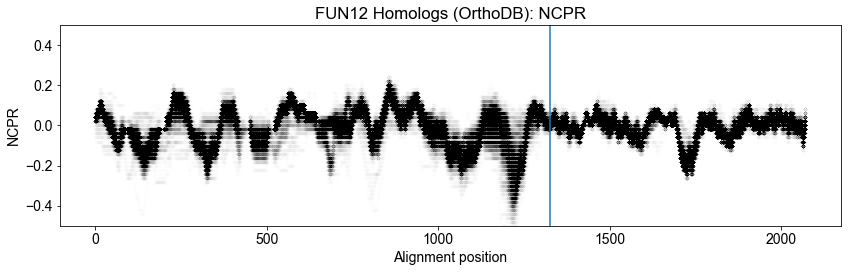

In [81]:
win = 50
cutoff = np.mean([len(i) for i in more_FUN12_all_seqs_gapped])*0.25
filtered = [i for i in more_FUN12_all_seqs_gapped if len(i.replace("-", "")) > cutoff]

to_plot = []

for i, seq in enumerate(filtered):
    to_plot.append(NCPR_gaps(seq, window=win))
    
plt.figure(figsize=(12, 4))
for homolog in to_plot:
    plt.scatter(np.arange(start2, start2+len(homolog)), homolog, color='k', alpha=0.002, s=10)
    

plt.xlabel('Alignment position')
plt.ylabel('NCPR')
plt.title('FUN12 Homologs (OrthoDB): NCPR')
plt.vlines(x=end2, ymin=-1, ymax=0.5)
plt.ylim((-0.5, 0.5))
plt.tight_layout()
plt.show()

In [82]:
def null_NCPR_gaps(sequence, window, swap="A"):
    """
    Given a sequence that may or may not contains gaps(str), return the net charge per residue in a window (win, int);
    by residue with a given window length (center-justified in gapped space).
    Will return the signed value(s), set av to 'True' to return the absolute value.
    """
    degapped_sequence = str(sequence).replace("-", "")
    ncprs = []
    for r in np.arange(len(sequence) - window - 1):
        segment = sequence[r:r+window]
        if swap == "A":
            f_minus_segment = (segment.count('K') + segment.count('D')) / window
            f_plus_segment = (segment.count('E') + segment.count('R')) / window
        else:
            f_minus_segment = (segment.count('R') + segment.count('D')) / window
            f_plus_segment = (segment.count('E') + segment.count('K')) / window
        if ((f_minus_segment == 0) & (f_plus_segment == 0)):
            ncprs.append(np.nan)
        else:
            ncprs.append(f_plus_segment - f_minus_segment)
    
    return(ncprs)

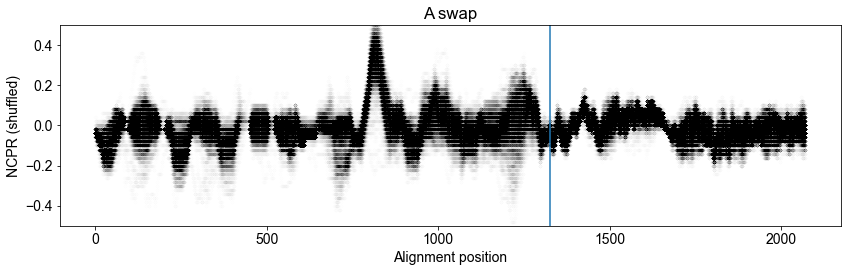

In [83]:
to_plot2 = []

plt.figure(figsize=(12, 4))
for i, seq in enumerate(filtered):
    to_plot2.append(null_NCPR_gaps(seq, window=win))
    
for j in to_plot2:    
    plt.scatter(np.arange(start2, start2+len(j)), j, color='k', alpha=0.002, s=10)

plt.xlabel('Alignment position')
plt.ylabel('NCPR (shuffled)')
plt.title('A swap')
plt.vlines(x=end2, ymin=-1, ymax=0.5)
plt.ylim((-0.5, 0.5))
plt.tight_layout()
plt.show()

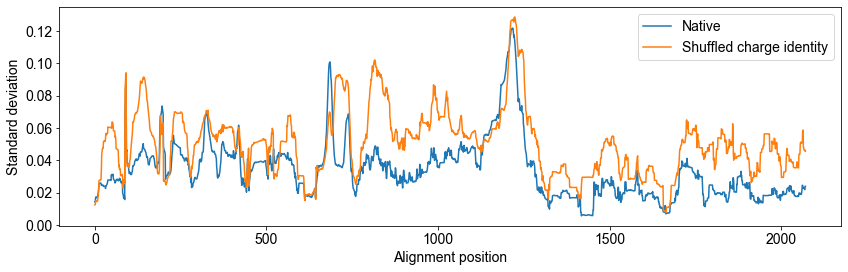

In [84]:
plt.figure(figsize=(12, 4))
plt.plot(np.sqrt(np.nanvar(np.array(to_plot), axis=0)), label = "Native")
plt.plot(np.sqrt(np.nanvar(np.array(to_plot2), axis=0)), label = "Shuffled charge identity")
plt.xlabel('Alignment position')
plt.ylabel('Standard deviation')
plt.legend()
plt.tight_layout()
plt.show()

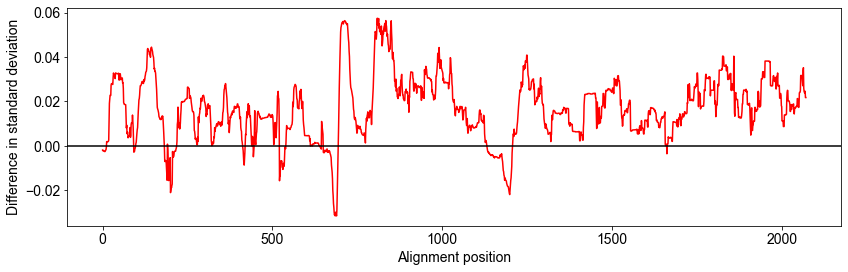

In [85]:
plt.figure(figsize=(12, 4))
plt.plot(np.sqrt(np.nanvar(np.array(to_plot2), axis=0))-np.sqrt(np.nanvar(np.array(to_plot), axis=0)), color='red')
plt.xlabel('Alignment position')
plt.ylabel('Difference in standard deviation')
plt.axhline(y=0, xmin=-100, xmax=2500, color = 'black')
plt.tight_layout()
plt.show()

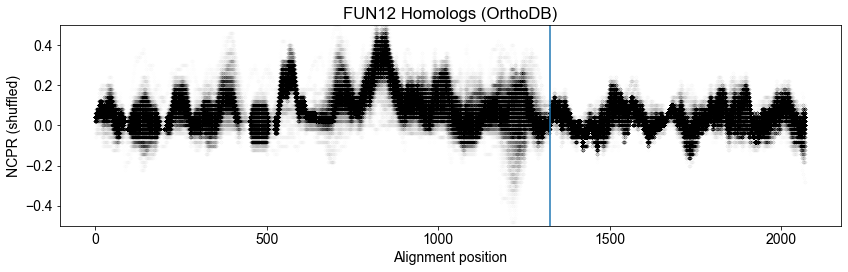

In [86]:
to_plot3 = []

plt.figure(figsize=(12, 4))
for i, seq in enumerate(filtered):
    to_plot3.append(null_NCPR_gaps(seq, window=win, swap="B"))
    
for j in to_plot3:    
    plt.scatter(np.arange(start2, start2+len(j)), j, color='k', alpha=0.002, s=10)

plt.xlabel('Alignment position')
plt.ylabel('NCPR (shuffled)')
plt.title('FUN12 Homologs (OrthoDB)')
plt.vlines(x=end2, ymin=-1, ymax=0.5)
plt.ylim((-0.5, 0.5))
plt.tight_layout()
plt.show()

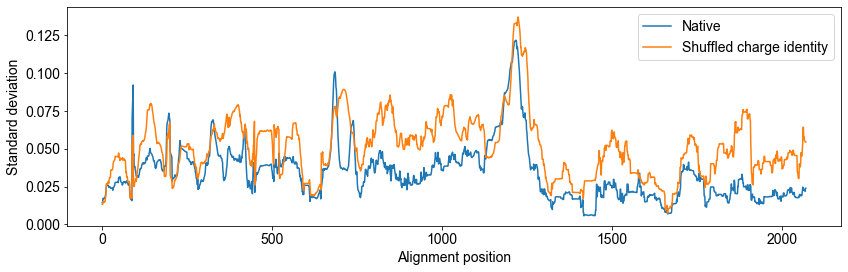

In [87]:
plt.figure(figsize=(12, 4))
plt.plot(np.sqrt(np.nanvar(np.array(to_plot), axis=0)), label = "Native")
plt.plot(np.sqrt(np.nanvar(np.array(to_plot3), axis=0)), label = "Shuffled charge identity")
plt.xlabel('Alignment position')
plt.ylabel('Standard deviation')
plt.legend()
plt.tight_layout()
plt.show()

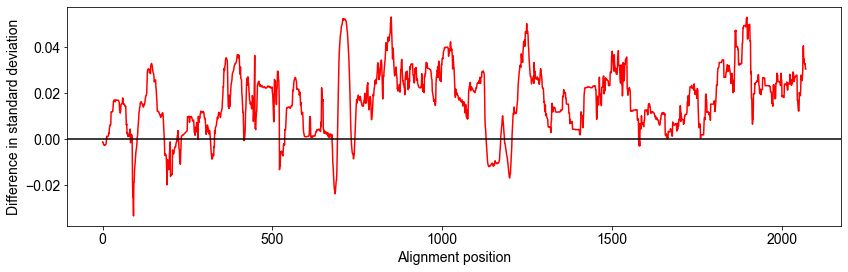

In [88]:
plt.figure(figsize=(12, 4))
plt.plot(np.sqrt(np.nanvar(np.array(to_plot3), axis=0))-np.sqrt(np.nanvar(np.array(to_plot), axis=0)), color='red')
plt.xlabel('Alignment position')
plt.ylabel('Difference in standard deviation')
plt.axhline(y=0, xmin=-100, xmax=2500, color = 'black')
plt.tight_layout()
plt.show()

## Secondary Structure Prediction from Alphafold

This is a different set of proteins, but I've extracted all the predictions from alphafold annotated as "eukaryotic translation initiation factor 5B" -- this includes a couple different paralogs in the plant genomes for example.

In [44]:
import mdtraj as md

In [45]:
fun12_af_ss = {}

for struct in glob.glob('if2-alphafold/*.pdb'):
    uni_id = struct[17:23]
    s = md.load(struct)
    ss = md.compute_dssp(s, simplified=True)[0]
    fun12_af_ss[uni_id] = ss

/Users/triandafillou/opt/anaconda3/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [46]:
test_h = [1 if i == 'H' else 0 for i in fun12_af_ss["F1QB47"]]
print(list(fun12_af_ss["F1QB47"]))
print(test_h)

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',

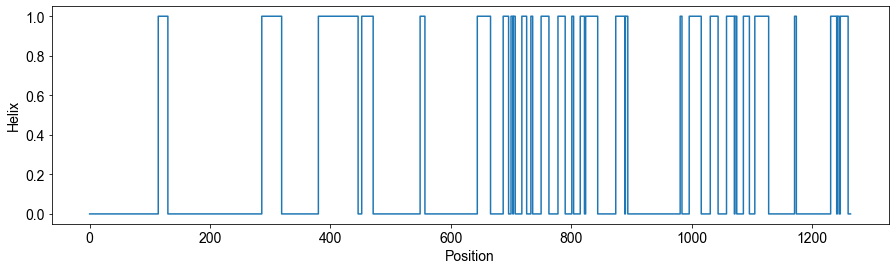

In [47]:
plt.figure(figsize=(15, 4))
plt.step(np.arange(len(test_h)), test_h)
plt.xlabel('Position')
plt.ylabel('Helix')
plt.show()

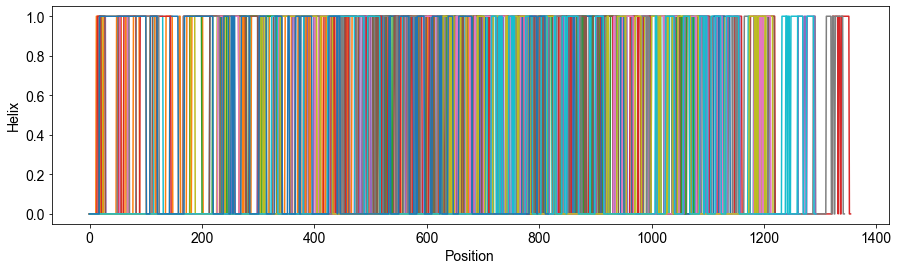

In [48]:
plt.figure(figsize=(15,4))
for pdb in fun12_af_ss.values():
    to_plot = [1 if i == 'H' else 0 for i in pdb]
    plt.plot(np.arange(len(to_plot)), to_plot)
plt.xlabel('Position')
plt.ylabel('Helix')
plt.show()

In [49]:
# Okay I definitely need to align the sequences, map to alignment position, and then go from there
# Specifically I'd be interested in seeing whether the helix found in the S. cer version is conserved in
# the structures from alphafold. I could also try to align some of the structures in pymold or chimera too.

In [50]:
FUN12_af = AlignIO.read('if2-alphafold/af_if2_aligned.fa', format='fasta')
for record in FUN12_af:
    record.id = record.description[5:11]

start = 624
end = 705

print(FUN12_af[:, start:end])

Alignment with 21 rows and 81 columns
PEEPEVLSGFLLKQRQEEERIAREKEEKRIREEEEKKRAAEQKI...AAE Q54XP6
AMLAK-LKQHMERQKEEEERRLREAEEEERRLREEERLAEEQRK...KDL Q4CSK4
AMLAK-LKMKMELQKAEEERLRLEAEEEERRIREEERLAEEQRK...AGK A4I9B4
--LAA-LRRQLELKKQLEEQEKLEREEEERLEKEEEERLANEEK...KKL P39730
--LAA-LKKQLELKKQLEEEQRRLEEEEEQRRLEEERLAAEEEA...KKL Q5A782
--VTA-LQKMLEEKRAREEEEQRIREEEARIAEEEKRLAEVEEA...QAL Q10251
--VRE-MQEALARRQEAEERKKREEEERLRKEEEERLKKEEEER...AKR Q0DFG2
--VRE-MQEALARRKEAEERQKREEEERLRKEEEERLRREEEER...AKR K7V1U2
--VRE-KQETLARWKEAEDGKKKEEEERLRKEEEERRIEEERER...AAK C0SUW8
--VRE-MQEALARRQEAEERKKREEEERLRKEEEERRRQEELER...ARR I1NH15
--VRE-MQEALARRQEAEERKKREEEERLRKEEEERRKQEELER...ARR I1LDH2
----------------------------------------KQQI...--- F4IGQ9
--VRE-MQEALARRQEAEERKKKEEEEKLRKEEEERRRQEELEA...AQK Q9SRE1
--VRE-MQEALARRQEAEERKKKEEEEKLRKEEEERRRQEELEA...AQK F4I420
GNLSL-IKEMLKKQQEEREEQERLQKEQQERDAQEEKERLEREH...QAL G5EGT7
SMVAA-MQEQLRKRKEEEERLEREEAERIRLEDEREEARLEAVR...RAR Q9VZP5
ATVRA-MQEALAKMKEEEERAKREEEERLKRLEE

In [51]:
# need to turn residue position into alignment position for each protein
np.where(np.array(FUN12_af[0].seq) != '-')[0]

array([  66,   67,   68, ..., 1554, 1555, 1556])

K7V1U2
1287
1293
I1NH15
1287
1355
I1LDH2
1287
1344
F4I420
1287
1294


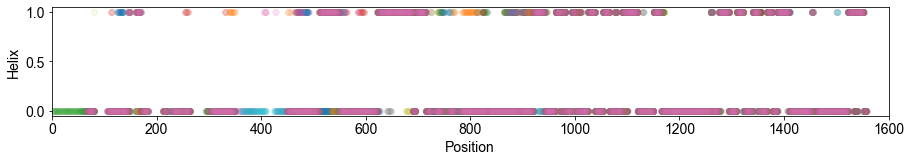

In [52]:
plt.figure(figsize=(15,2))
for homolog in FUN12_af:
    to_plot_x = np.where(np.array(homolog.seq) != '-')[0]
    pdb = fun12_af_ss[homolog.id]
    try:
        to_plot_y = [1 if i == 'H' else 0 for i in pdb]
        plt.scatter(to_plot_x, to_plot_y, alpha=0.1)
    except ValueError:
        print(homolog.id)
        print(len(to_plot_x))
        print(len(to_plot_y))
plt.xlim((-1,1600))
plt.xlabel('Position')
plt.ylabel('Helix')
plt.savefig("helix-conservation-v0.png")
plt.show()

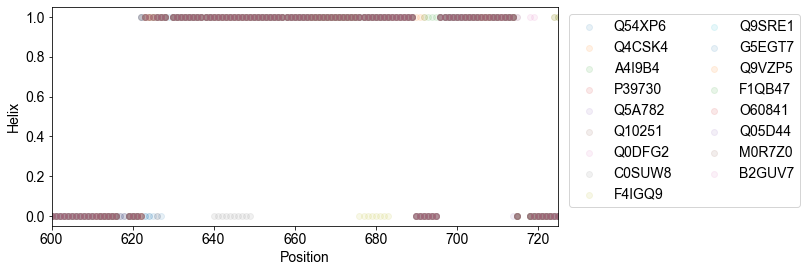

In [53]:
plt.figure(figsize=(12,4))
for homolog in FUN12_af:
    to_plot_x = np.where(np.array(homolog.seq) != '-')[0]
    pdb = fun12_af_ss[homolog.id]
    try:
        to_plot_y = [1 if i == 'H' else 0 for i in pdb]
        plt.scatter(to_plot_x, to_plot_y, label = homolog.id, alpha=0.1)
    except ValueError:
        continue
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1.0),
          ncol=2, fancybox=True, shadow=False)
plt.xlabel('Position')
plt.ylabel('Helix')
plt.xlim((600, 725))
plt.tight_layout()
plt.savefig("helix-conservation-zoom-v0.png")
plt.show()

## Secondary Structure on Alignment

In [54]:
recs = []

for sp in FUN12_af:
    sequence = []
    i = 0
    for a, aa in enumerate(sp.seq):
        if aa == '-':
            sequence.append('-')
        else:
            if fun12_af_ss[sp.id][i] not in ["H", "E", "C"]:
                print(sp.id)
                print(a)
                break
            sequence.append(fun12_af_ss[sp.id][i])
            i += 1
    sequence = ''.join(sequence)        
    record = SeqIO.SeqRecord(seq = Seq(sequence), id = sp.id)
    recs.append(record)
    
fun12_ss_alignment = AlignIO.MultipleSeqAlignment(records=recs)

In [55]:
print(fun12_ss_alignment[:, start:end])

Alignment with 21 rows and 81 columns
CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q54XP6
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q4CSK4
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH A4I9B4
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH P39730
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q5A782
--CHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q10251
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q0DFG2
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH K7V1U2
--HHH-HHHHHHHHHHCCCCCCCCCCHHHHHHHHHHHHHHHHHH...HHH C0SUW8
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH I1NH15
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH I1LDH2
----------------------------------------HHHH...--- F4IGQ9
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q9SRE1
--HHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH F4I420
CHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH G5EGT7
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...HHH Q9VZP5
HHHHH-HHHHHHHHHHHHHHHHHHHHHHHHHHHH

In [ ]:
#SeqIO.write(fun12_ss_alignment, "if2-alphafold/fun12-ss-alignment.fa", "fasta")

In [89]:
def get_ss_freqs(seq, counts = False, sort_output = True, gaps = False):
    ss_types = ['C', 'E', 'H']
    
    all_seq_ss = []
    all_seq_freqs = []
    
    # Parse sequence
    seq = list(seq)
    seq_ss, seq_counts = np.unique(seq, return_counts=True)
    zero_freq_ss = np.setxor1d(ss_types, seq_ss)

    seq_ss = np.append(seq_ss, zero_freq_ss)
    seq_freqs = np.append(seq_counts, np.zeros(zero_freq_ss.size))
    if not counts:
        seq_freqs = seq_freqs / len(seq)

    if sort_output:
        seq_freqs_sorted = seq_freqs[seq_ss.argsort()]
        all_seq_freqs.append(seq_freqs_sorted)

    else:
        all_seq_ss.append(seq_ss)
        all_seq_freqs.append(seq_freqs)
    
    if sort_output:
        return(all_seq_freqs)
    else:
        return(all_seq_ss, all_seq_freqs)

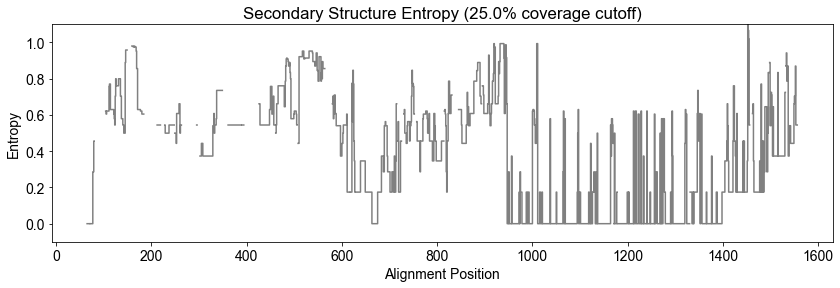

In [100]:
FUN12_ss_mat = np.array(fun12_ss_alignment)

FUN12_all_ss_ents = []
for p, pos in enumerate(FUN12_ss_mat.T):
    FUN12_all_ss_ents.append(stats.entropy(get_ss_freqs(pos, gaps=True)[0],base=3))

ss_coverage_mask = []
    

for p, pos in enumerate(FUN12_ss_mat.T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff2:
        ss_coverage_mask.append(np.nan)
    else:
        ss_coverage_mask.append(1)
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(start2, start2+len(FUN12_all_ss_ents)),
         np.array(FUN12_all_ss_ents)*np.array(ss_coverage_mask), color = 'grey')
plt.xlabel('Alignment Position')
plt.ylabel('Entropy')
plt.title("Alphafold alignment Secondary Structure Entropy ({}% coverage cutoff)".format(coverage_cutoff2*100))
#plt.vlines(x=end2, ymin=-1, ymax=7)
plt.ylim((-0.1,1.1))
plt.show()

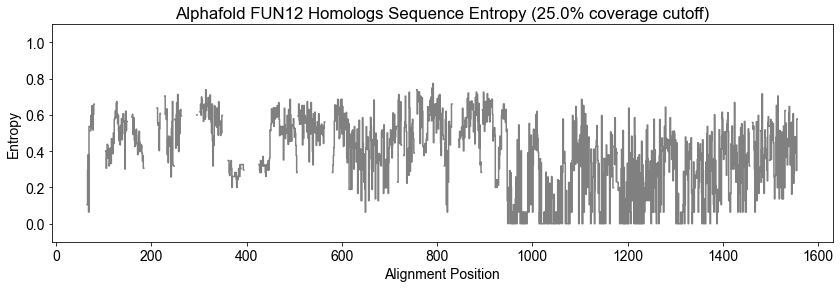

In [109]:
FUN12_af_seq_ents_b20 = []

for p, pos in enumerate(np.array(FUN12_af).T):
    FUN12_af_seq_ents_b20.append(stats.entropy(get_aa_freqs(pos, gaps=True)[0], base=20))

fun12_af_coverage_mask = []
    
for p, pos in enumerate(np.array(FUN12_af).T):
    seqlen = len(''.join(pos))
    coverage = seqlen / (seqlen - ''.join(pos).count('-'))
    if 1/coverage < coverage_cutoff2:
        fun12_af_coverage_mask.append(np.nan)
    else:
        fun12_af_coverage_mask.append(1)
        
        
    
plt.figure(figsize=(14, 4))
plt.step(np.arange(start2, start2+len(FUN12_af_seq_ents_b20)),
         np.array(FUN12_af_seq_ents_b20)*np.array(fun12_af_coverage_mask), color = 'grey')
plt.xlabel('Alignment Position')
plt.ylabel('Entropy')
plt.title("Alphafold FUN12 Homologs Sequence Entropy ({}% coverage cutoff)".format(coverage_cutoff2*100))
#plt.vlines(x=end2, ymin=-1, ymax=7)
plt.ylim((-0.1,1.1))
plt.show()